Sample mean = 58.00, Sample std = 2.00


Output()


Posterior summaries (Weak Prior):
         mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
mu     58.001  0.766    56.415     59.504      0.020    0.020    1570.0   
sigma   2.348  0.677     1.307      3.706      0.016    0.018    1883.0   

       ess_tail  r_hat  
mu       1493.0    1.0  
sigma    2166.0    1.0  

Frequentist estimates:
Mean: 58.00
SD:   2.00


Output()


Posterior summaries (Strong Prior):
         mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
mu     99.522  1.001    97.422    101.384      0.017    0.016    3656.0   
sigma  31.009  4.126    22.964     39.017      0.071    0.068    3413.0   

       ess_tail  r_hat  
mu       2588.0    1.0  
sigma    2557.0    1.0  


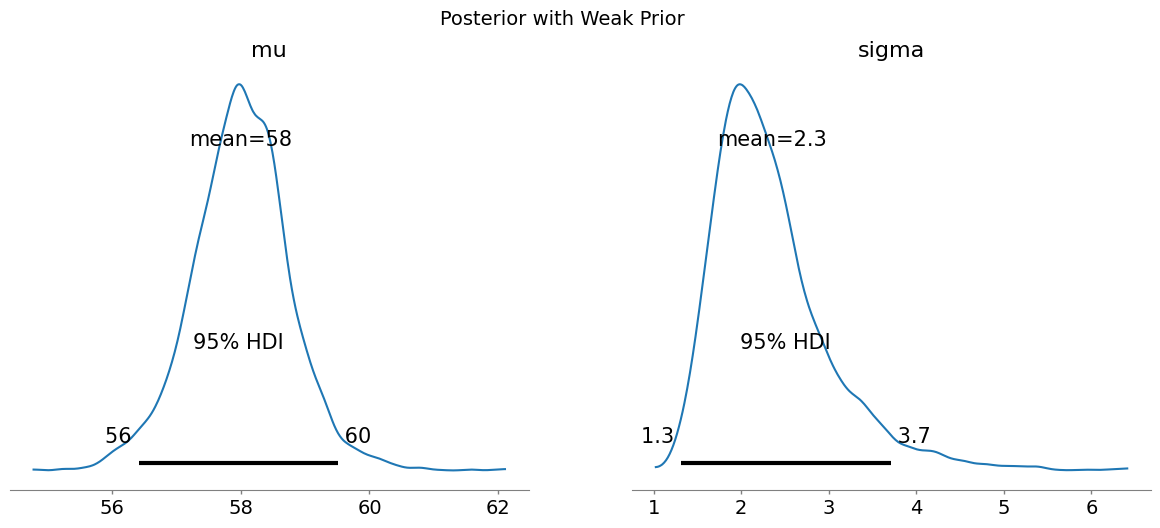

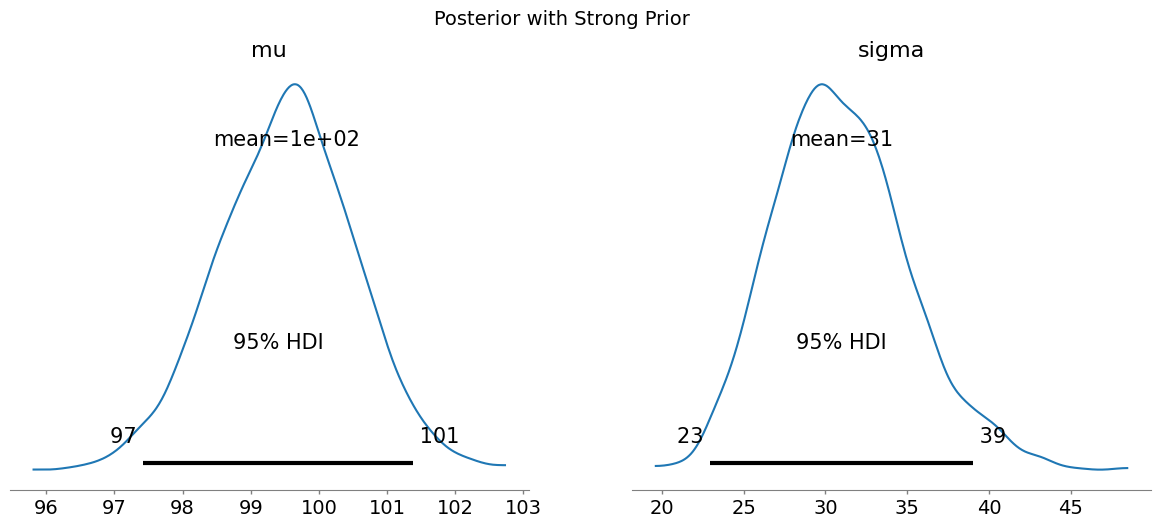

In [ ]:
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

data = np.array([56, 60, 58, 55, 57, 59, 61, 56, 58, 60])
x_bar = data.mean()
print(f"Sample mean = {x_bar:.2f}, Sample std = {data.std(ddof=1):.2f}")

# a) Model with weak prior
with pm.Model() as weak_model:
    mu = pm.Normal("mu", mu=x_bar, sigma=10)
    sigma = pm.HalfNormal("sigma", sigma=10)
    y = pm.Normal("y", mu=mu, sigma=sigma, observed=data)

    trace_weak = pm.sample(2000, tune=2000, target_accept=0.9, random_seed=42)
    summary_weak = az.summary(trace_weak, var_names=["mu", "sigma"], hdi_prob=0.95)

# b) 95% HDI
print("\nPosterior summaries (Weak Prior):")
print(summary_weak)

# c) Compare with frequentist estimates
print("\nFrequentist estimates:")
print(f"Mean: {np.mean(data):.2f}")
print(f"SD:   {np.std(data, ddof=1):.2f}")

# d) Model with strong prior
with pm.Model() as strong_model:
    mu = pm.Normal("mu", mu=50, sigma=1)  # strong prior mu ~ N(50, 1*1)
    sigma = pm.HalfNormal("sigma", sigma=10)
    y = pm.Normal("y", mu=mu, sigma=sigma, observed=data)

    trace_strong = pm.sample(2000, tune=2000, target_accept=0.9, random_seed=42)
    summary_strong = az.summary(trace_strong, var_names=["mu", "sigma"], hdi_prob=0.95)

print("\nPosterior summaries (Strong Prior):")
print(summary_strong)

az.plot_posterior(trace_weak, var_names=["mu", "sigma"], hdi_prob=0.95)
plt.suptitle("Posterior with Weak Prior", fontsize=14)
plt.show()

az.plot_posterior(trace_strong, var_names=["mu", "sigma"], hdi_prob=0.95)
plt.suptitle("Posterior with Strong Prior", fontsize=14)
plt.show()
